# Visualize Networks

In [1]:
import os
import graph_tool.all as gt
import graph_tool.draw as gtd
from graph_tool.stats import vertex_hist
import numpy as np
import pickle

In [10]:
# Load the graph
g = gt.load_graph("/mnt/disk2/Data/3_Day_Graphs/2021-05-16.graphml")
g.ep

{'Ending date': <EdgePropertyMap object with value type 'string', for Graph 0x7f099c7a0490, at 0x7f099c76d3d0>, 'Normal Weights': <EdgePropertyMap object with value type 'double', for Graph 0x7f099c7a0490, at 0x7f099c76c950>, 'Number of rts': <EdgePropertyMap object with value type 'int32_t', for Graph 0x7f099c7a0490, at 0x7f099c76c110>, 'Total of rts': <EdgePropertyMap object with value type 'int32_t', for Graph 0x7f099c7a0490, at 0x7f099c76d110>}

In [7]:
#pos_fruchterman_reingold Layout
pos_fruchterman_reingold = gt.fruchterman_reingold_layout(g, weight=g.ep['Normal Weights'])
#pos_sfdp = gtd.sfdp_layout(g)

In [15]:
with open("/mnt/disk2/Data/Pickle/pos_fruchterman_reingold.pkl", "wb") as f:
    pickle.dump(pos_fruchterman_reingold, f)

In [ ]:
# Assign colors based on 'Political Affiliation'
color_dict = {
    'No Retweets': [0.5, 0.5, 0.5, 1],        # Gray for 'No Retweets'
    'Retweets Centro': [0, 1, 0, 1],          # Green for 'Retweets Centro'
    'Retweets Derecha': [1, 0, 0, 1],         # Red for 'Retweets Derecha'
    'Retweets Izquierda': [0, 0, 1, 1],       # Blue for 'Retweets Izquierda'
}

In [ ]:
# Get vertex colors from the dictionary
# vertex_colors = g.new_vertex_property('vector<double>')
# for v in g.vertices():
#     affiliation = g.vertex_properties["Political Affiliation"][v]
#     vertex_colors[v] = color_dict.get(affiliation, [0.5, 0.5, 0.5, 1])  # Default to gray if not found

# Node Size based on Degree (influenced by edge weights)
hist, _ = vertex_hist(g, "total")
max_size = 25
min_size = 5
vertex_sizes = g.new_vertex_property('double')
size_factor = (hist - hist.min()) / (hist.max() - hist.min())
vertex_sizes.a = size_factor * (max_size - min_size) + min_size

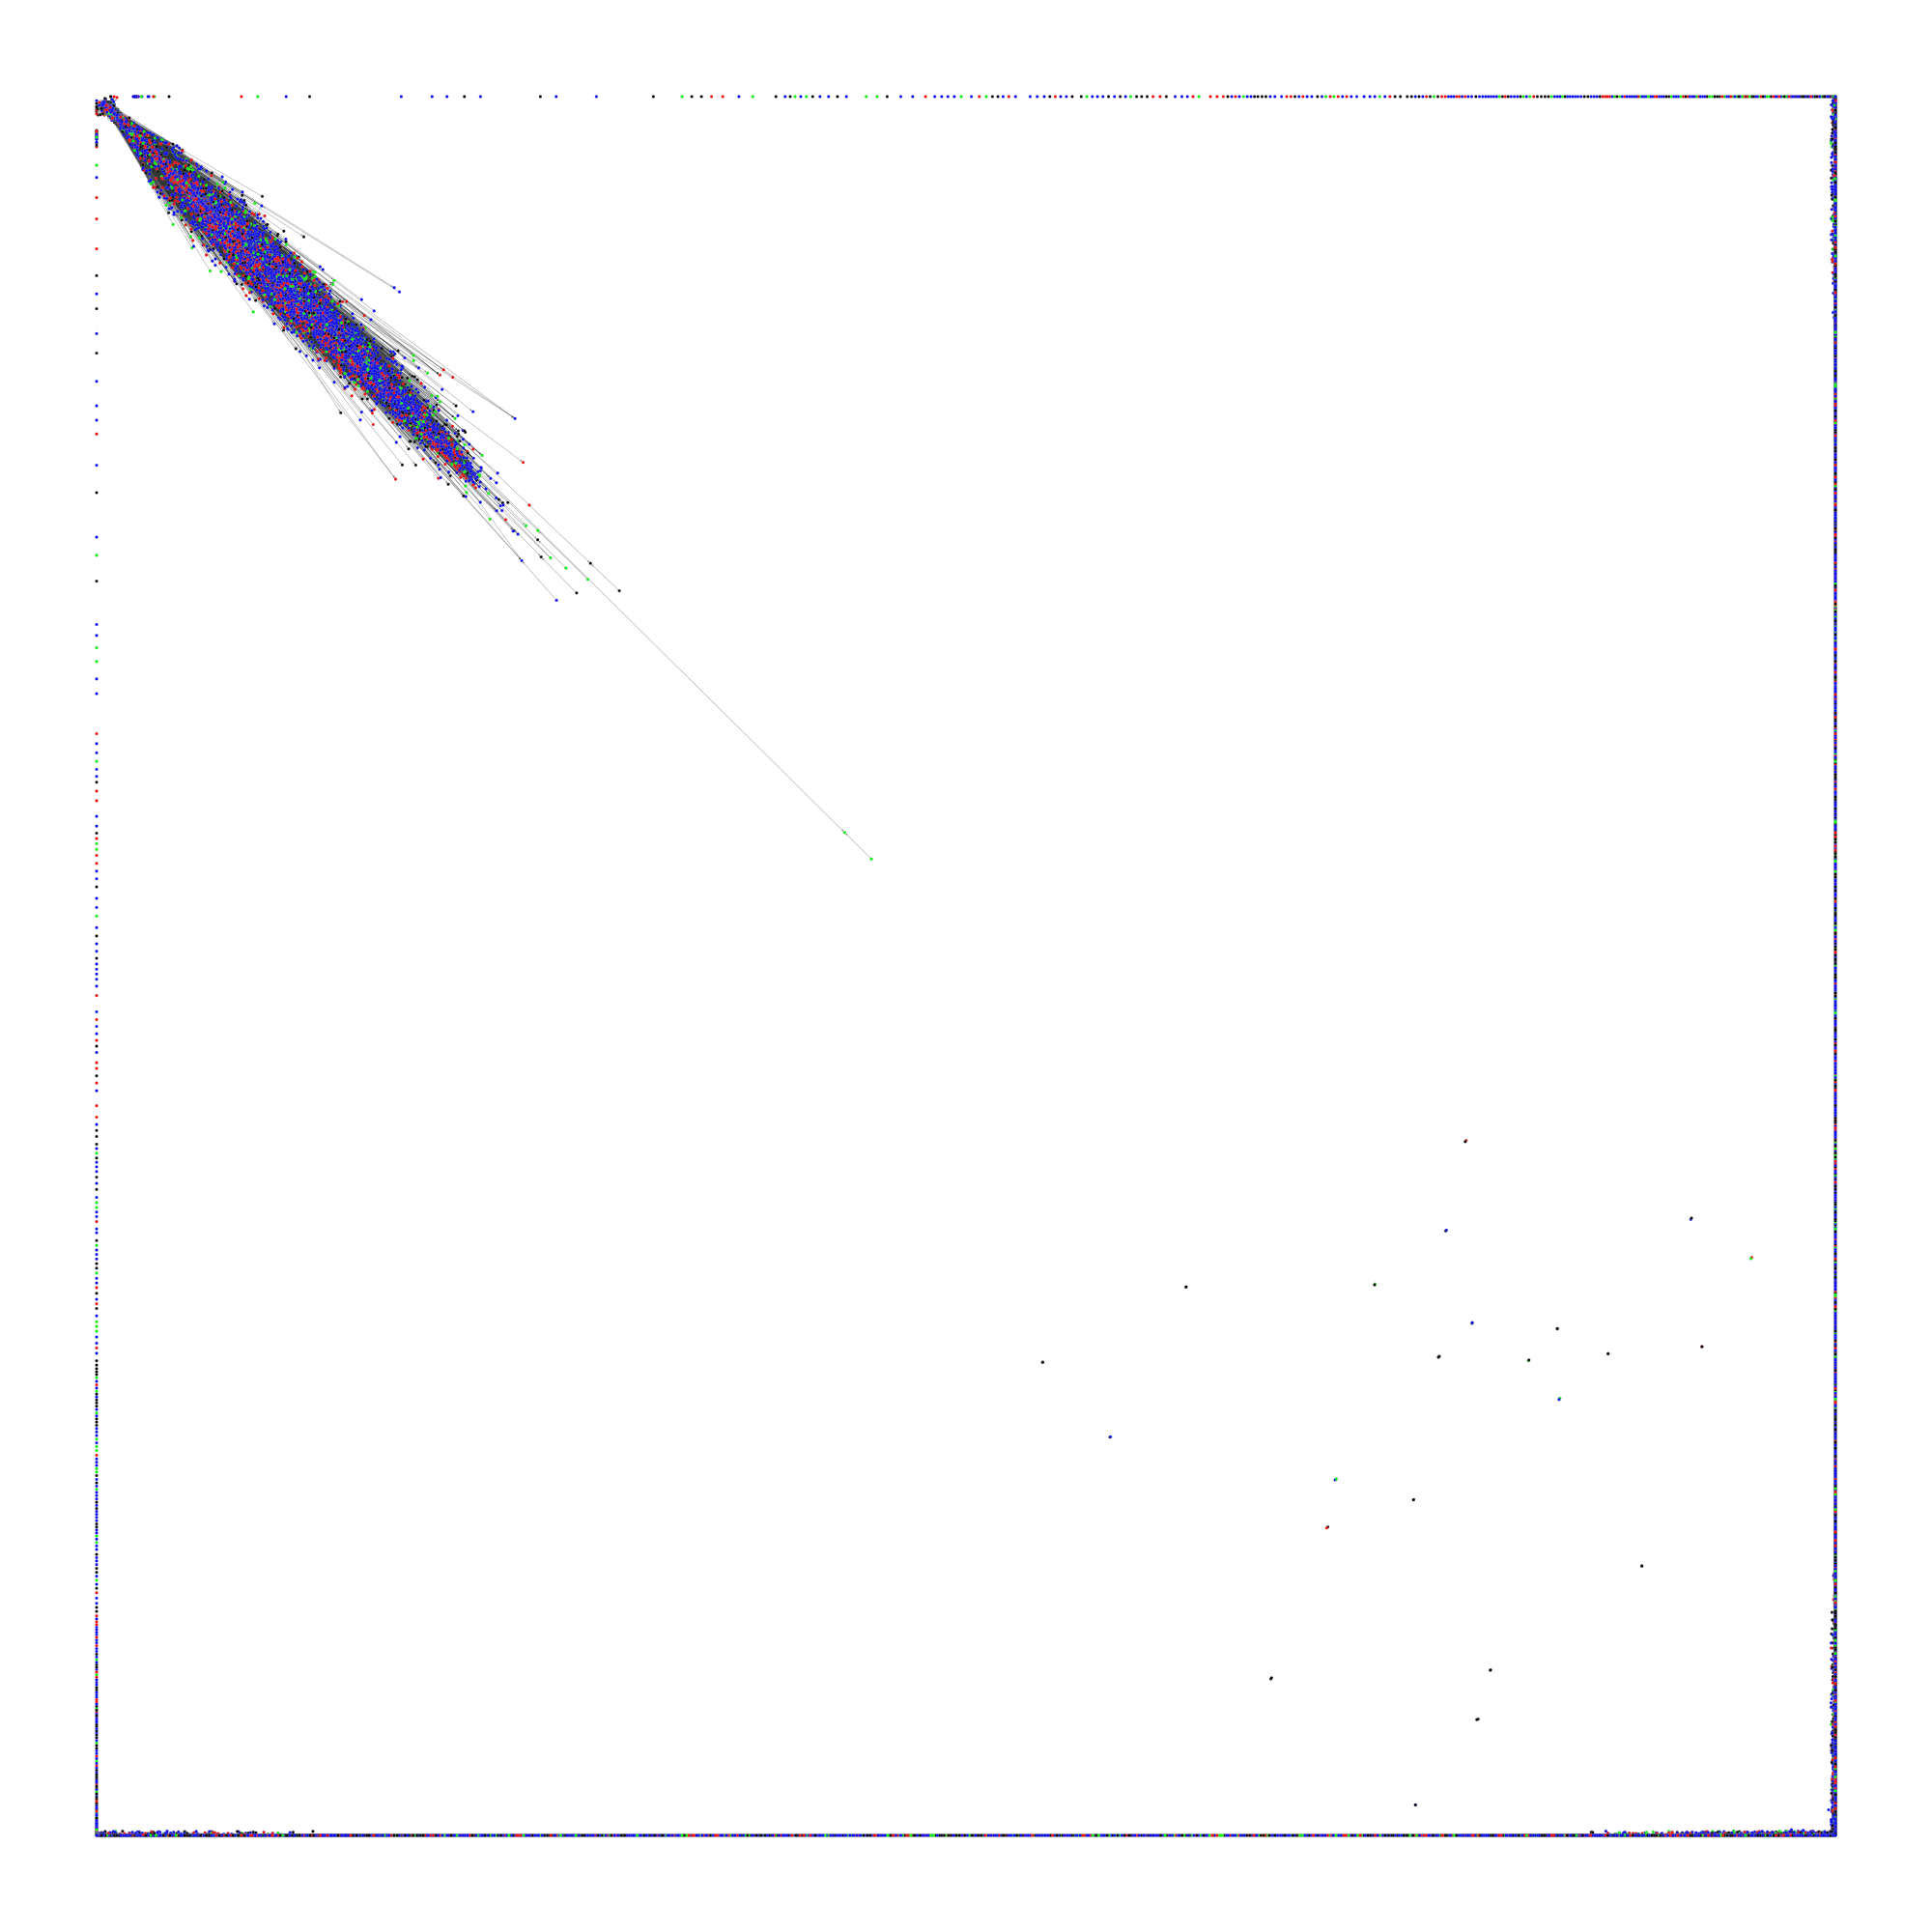

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f2c94af7050, at 0x7f2c90bfe690>

In [9]:
# Draw the graph
gt.graph_draw(g, pos_fruchterman_reingold, vertex_fill_color = g.vp['Color'], output_size = (1000, 1000))

## Daily retweet network (with no rolling window)

In [18]:
# Load the graph
g = gt.load_graph("../../../Data/Daily_graphs/2021-04-28.graphml")
g.ep

{'weight': <EdgePropertyMap object with value type 'int32_t', for Graph 0x7f099cf6f1d0, at 0x7f099c770350>}

In [21]:
# Prueba Fruchterman Reingold
# Runtime ~2 h
pos_fruchterman_reingold = gt.fruchterman_reingold_layout(g, weight = g.ep['weight'])

In [38]:
labels = [g.vp["Label"][i] for i in range(23934)]

In [42]:
color_dict = {
    'No Retweets': [0.5, 0.5, 0.5, 1],        # Gray for 'No Retweets'
    'Centro': [0, 1, 0, 1],          # Green for 'Retweets Centro'
    'Derecha': [1, 0, 0, 1],         # Red for 'Retweets Derecha'
    'Izquierda': [0, 0, 1, 1],       # Blue for 'Retweets Izquierda'
}

In [51]:
# Get vertex colors from the dictionary
vertex_colors = g.new_vertex_property('vector<double>')
for v in g.vertices():
    affiliation = g.vertex_properties["Label"][v]
    vertex_colors[v] = color_dict.get(affiliation, [0.5, 0.5, 0.5, 1])  # Default to gray if not found

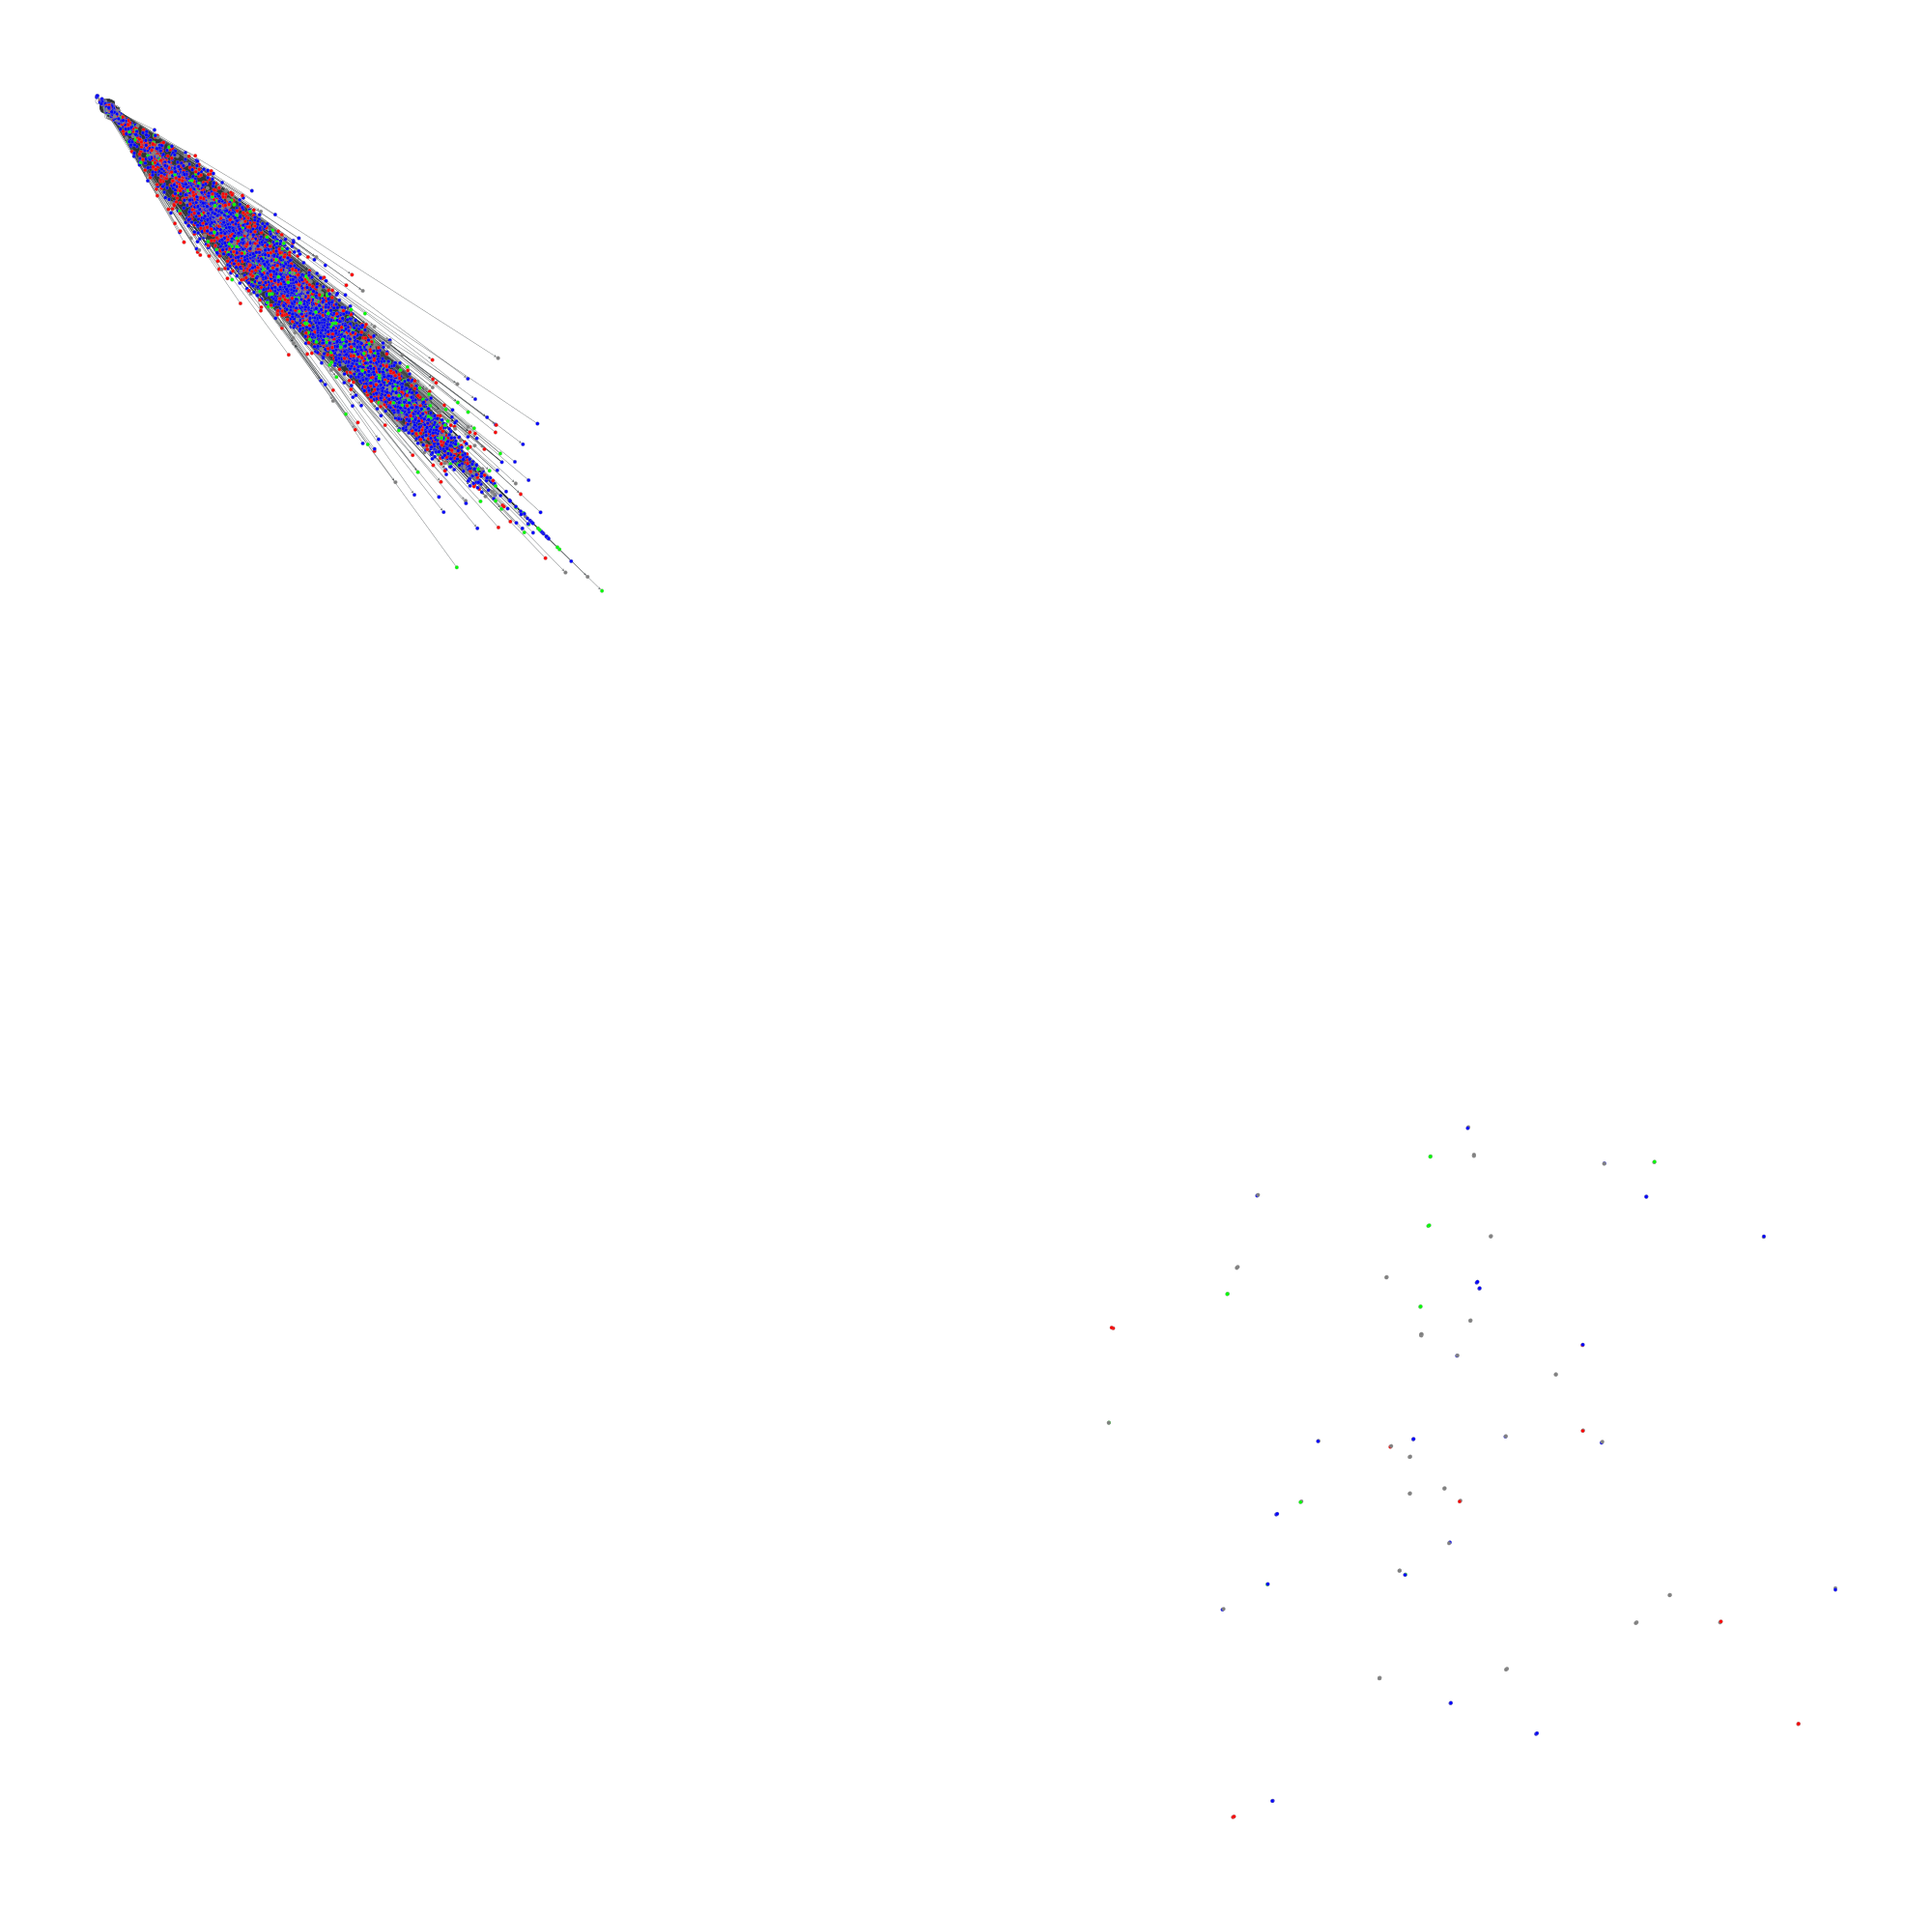

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f099cf6f1d0, at 0x7f09915562d0>

In [57]:
# Runtime ~20 s
gt.graph_draw(g, pos_fruchterman_reingold, vertex_fill_color = vertex_colors, output_size = (1000, 1000))

In [59]:
pip install Cython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install ForceAtlas2

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      Compiling forceatlas2/fa2util.py because it changed.
      [1/1] Cythonizing forceatlas2/fa2util.py
      /mnt/disk2/anaconda3/envs/gt_global/lib/python3.11/site-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /tmp/pip-install-_c1wrp_v/forceatlas2_25fa8aeefa6a413c8563874a14775648/forceatlas2/fa2util.pxd
        tree = Parsing.p_module(s, pxd, full_module_name)
      error: unknown file type '.pxd' (from 'forceatlas2/fa2util.pxd')
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for ForceAtlas2
  Running setup.py clean for ForceAtlas2
Failed to build ForceAtlas2
ERROR: Could not build whee